In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from endpoints import *

import warnings
warnings.filterwarnings('ignore')

## Reducción de dimensionalidad para índice de percepción/sentiment de la comunidad
---

* Listado de monedas

In [2]:
crypto_ids = ['bitcoin',
 'dash',
 'decred',
 'dero',
 'grin',
 'monero',
 'pirate-chain',
 'secret',
 'verge',
 'zcash',
 'zencash']

### 1. Procesamiento de la columna categórica 'trust_score' del endpoint tickers
---

Llamamos al endpoint

In [3]:
tickers_dict = get_coins_tickers(crypto_ids)

Exploramos los posibles valores de la columna trusts scores

In [4]:
for key in tickers_dict:
    unique_trust_scores = tickers_dict[key]['trust_score'].unique()
    print(f"Puntajes únicos en el dataframe {key}: {unique_trust_scores}")

Puntajes únicos en el dataframe df_bitcoin_ticker: ['green']
Puntajes únicos en el dataframe df_dash_ticker: ['green' 'yellow']
Puntajes únicos en el dataframe df_decred_ticker: ['green' 'yellow' None 'red']
Puntajes únicos en el dataframe df_dero_ticker: ['green' None]
Puntajes únicos en el dataframe df_grin_ticker: ['green' 'yellow' 'red' None]
Puntajes únicos en el dataframe df_monero_ticker: ['green' 'yellow' 'red' None]
Puntajes únicos en el dataframe df_pirate_chain_ticker: ['green' None]
Puntajes únicos en el dataframe df_secret_ticker: ['green' 'yellow' None]
Puntajes únicos en el dataframe df_verge_ticker: ['green' 'yellow' 'red' None]
Puntajes únicos en el dataframe df_zcash_ticker: ['green' 'yellow' 'red' None]
Puntajes únicos en el dataframe df_zencash_ticker: ['green' 'yellow' 'red' None]


Mapeamos a valores numéricos, y reemplazamos el valor categórico con el numérico

In [5]:
trust_score_mapping = {'green': 10, 'yellow': 5, 'red': 1}

for key in tickers_dict:
    tickers_dict[key]['trust_score'] = tickers_dict[key]['trust_score'].map(trust_score_mapping)


Guardamos en lista de dataframes, para posterior mapeo

In [6]:
tickers_df_list = list()

In [7]:
for key in tickers_dict:
    tickers_df_list.append((tickers_dict[key]))

In [8]:
tickers_df_list[0]

,base,target,market_name,market_identifier,market_has_trading_incentive,last,volume,converted_last_btc,converted_last_eth,converted_last_usd,...,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,BTC,USDT,Binance,binance,False,29251.810000,2.808883e+04,1.000124,15.975181,29219,...,0.010034,2023-08-16 02:14:05,2023-08-16 02:14:05,2023-08-16 02:14:05,False,False,https://www.binance.com/en/trade/BTC_USDT?ref=...,None,bitcoin,tether
1,BTC,TUSD,Binance,binance,False,29249.390000,5.734182e+04,1.000203,15.976442,29222,...,0.012872,2023-08-16 02:14:16,2023-08-16 02:14:16,2023-08-16 02:14:16,False,False,https://www.binance.com/en/trade/BTC_TUSD?ref=...,None,bitcoin,true-usd
2,BTC,BUSD,XT.COM,xt,False,29229.990000,7.863212e+02,1.000000,15.978601,29216,...,0.010034,2023-08-16 02:20:56,2023-08-16 02:20:56,2023-08-16 02:20:56,False,False,https://www.xt.com/trade/btc_busd,None,bitcoin,binance-usd
3,BTC,USDT,XT.COM,xt,False,29257.450000,8.372848e+03,1.000096,15.980136,29218,...,0.010034,2023-08-16 02:20:56,2023-08-16 02:20:56,2023-08-16 02:20:56,False,False,https://www.xt.com/trade/btc_usdt,None,bitcoin,tether
4,BTC,USDT,Tidex,tidex,False,29257.460000,2.582605e+03,1.000096,15.979593,29220,...,0.018930,2023-08-16 02:19:54,2023-08-16 02:19:54,2023-08-16 02:21:47,False,False,None,None,bitcoin,tether
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ETC,BTC,Coinsbit,coinsbit,False,0.000570,5.630553e+03,1.000000,15.978601,29216,...,0.196471,2023-08-16 02:01:00,2023-08-16 02:01:00,2023-08-16 02:20:48,False,False,https://coinsbit.io/trade/ETC_BTC,None,ethereum-classic,bitcoin
96,TRX,BTC,Binance,binance,False,0.000003,6.362235e+06,1.000000,15.975775,29215,...,0.380228,2023-08-16 02:12:52,2023-08-16 02:12:52,2023-08-16 02:12:52,False,False,https://www.binance.com/en/trade/TRX_BTC?ref=3...,None,tron,bitcoin
97,BTC,BUSD,QMall,qmall,False,29228.000000,1.389805e+00,1.000000,15.973853,29216,...,0.060309,2023-08-16 02:17:00,2023-08-16 02:17:00,2023-08-16 02:19:38,False,False,https://qmall.io/trade/BTC_BUSD,None,bitcoin,binance-usd
98,BTC,USDT,Ace,ace,False,29256.250000,1.326879e+02,1.000055,15.974732,29218,...,0.042924,2023-08-16 02:19:27,2023-08-16 02:19:27,2023-08-16 02:19:27,False,False,https://ace.io/trade/BTC/USDT,None,bitcoin,tether


Aplanamos el dato de múltiples filas por moneda, a un solo valor por moneda, ponderando respecto a la cantidad de brokers

In [9]:
average_trust_scores = {}

for key, dataset in tickers_dict.items():
    # Usamos una base de promedio, y le agregamos un factor en aumento cuando aumentan el número de brokers
    avg_score = dataset['trust_score'].mean() * dataset.shape[0] * 1.5
    
    # Limpio las keys para usar los ids (y que sea más simple cruzar datos)
    if 'pirate_chain' not in key:
        clean_key = key.split('_')[1]
    else: 
        clean_key = 'pirate-chain'
    
    average_trust_scores[clean_key] = avg_score

average_trust_scores


{'bitcoin': 1500.0,
 'dash': 1297.5,
 'decred': 414.5806451612903,
 'dero': 90.0,
 'grin': 103.5,
 'monero': 1176.0,
 'pirate-chain': 165.0,
 'secret': 458.18181818181813,
 'verge': 401.68604651162786,
 'zcash': 1178.804347826087,
 'zencash': 562.9897959183673}

### 2. Procesamiento de las columnas numéricas del endpoint Coins
---

Llamamos al endpoint

In [10]:
df_coins, df_developers = get_coins_id_filtered(crypto_ids)

In [11]:
df_coins

,id,symbol,name,block_time_in_minutes,hashing_algorithm,categories,genesis_date,sentiment_votes_up_percentage,sentiment_votes_down_percentage,watchlist_portfolio_users,market_cap_rank,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated
0,bitcoin,btc,Bitcoin,10,SHA-256,"[Cryptocurrency, Layer 1 (L1)]",2009-01-03,74.16,25.84,1328504,1,1,83.151,99.241,83.341,100.011,0.073,2023-08-16 02:24:30.209
1,dash,dash,Dash,2,X11,"[Alleged SEC Securities, Cryptocurrency, Maste...",2014-01-19,58.33,41.67,82387,108,39,51.994,65.377,43.398,55.664,0.010,2023-08-16 02:24:27.130
2,decred,dcr,Decred,5,Blake-256,"[Cryptocurrency, Governance, Privacy Coins]",2016-02-08,66.67,33.33,16455,152,67,48.677,77.359,37.138,31.911,0.002,2023-08-16 02:24:33.869
3,dero,dero,Dero,0,AstroBWT,"[Smart Contract Platform, Privacy Coins]",2017-12-05,75.00,25.00,9745,439,482,27.963,22.596,30.536,11.724,0.003,2023-08-16 02:24:21.515
4,grin,grin,Grin,1,Multiple Algorithms,"[Cryptocurrency, Privacy Coins]",2019-01-15,0.00,100.00,7963,1194,226,35.921,72.995,6.546,21.440,0.002,2023-08-16 02:24:33.070
5,monero,xmr,Monero,2,RandomX,[Privacy Coins],2014-04-18,92.31,7.69,114840,26,12,61.097,87.299,51.877,57.940,0.034,2023-08-16 02:24:37.138
6,pirate-chain,arrr,Pirate Chain,1,Equihash,"[Privacy Coins, Zero Knowledge (ZK)]",2018-08-29,80.00,20.00,18368,422,217,36.358,51.505,33.960,11.999,0.001,2023-08-16 02:23:49.885
7,secret,scrt,Secret,0,None,"[Smart Contract Platform, Privacy Coins, Cosmo...",None,84.62,15.38,58068,317,120,43.613,82.601,10.315,32.111,0.002,2023-08-16 02:24:34.942
8,verge,xvg,Verge,0,Scrypt,[Privacy Coins],2014-10-09,66.67,33.33,42565,356,64,49.214,79.653,43.240,32.093,0.003,2023-08-16 02:24:35.845
9,zcash,zec,Zcash,0,Equihash,"[Privacy Coins, Zero Knowledge (ZK)]",2016-10-28,76.92,23.08,68637,143,18,56.684,87.898,39.685,53.365,0.004,2023-08-16 02:24:37.553


Inputamos el valor

In [12]:
df_coins.loc[df_coins['id'] == 'secret', 'hashing_algorithm'] = 'X11'

In [13]:
df_coins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               11 non-null     object        
 1   symbol                           11 non-null     object        
 2   name                             11 non-null     object        
 3   block_time_in_minutes            11 non-null     int64         
 4   hashing_algorithm                11 non-null     object        
 5   categories                       11 non-null     object        
 6   genesis_date                     9 non-null      object        
 7   sentiment_votes_up_percentage    11 non-null     float64       
 8   sentiment_votes_down_percentage  11 non-null     float64       
 9   watchlist_portfolio_users        11 non-null     int64         
 10  market_cap_rank                  11 non-null     int64         


Creamos la nueva columna para reflejar la valoración de los brokers

In [14]:
df_coins['brokers_score'] = df_coins['id'].map(average_trust_scores)

Con la nueva columna, ahora vamos a trabajar en el índice unificado

In [15]:
df_coins

,id,symbol,name,block_time_in_minutes,hashing_algorithm,categories,genesis_date,sentiment_votes_up_percentage,sentiment_votes_down_percentage,watchlist_portfolio_users,market_cap_rank,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,brokers_score
0,bitcoin,btc,Bitcoin,10,SHA-256,"[Cryptocurrency, Layer 1 (L1)]",2009-01-03,74.16,25.84,1328504,1,1,83.151,99.241,83.341,100.011,0.073,2023-08-16 02:24:30.209,1500.000000
1,dash,dash,Dash,2,X11,"[Alleged SEC Securities, Cryptocurrency, Maste...",2014-01-19,58.33,41.67,82387,108,39,51.994,65.377,43.398,55.664,0.010,2023-08-16 02:24:27.130,1297.500000
2,decred,dcr,Decred,5,Blake-256,"[Cryptocurrency, Governance, Privacy Coins]",2016-02-08,66.67,33.33,16455,152,67,48.677,77.359,37.138,31.911,0.002,2023-08-16 02:24:33.869,414.580645
3,dero,dero,Dero,0,AstroBWT,"[Smart Contract Platform, Privacy Coins]",2017-12-05,75.00,25.00,9745,439,482,27.963,22.596,30.536,11.724,0.003,2023-08-16 02:24:21.515,90.000000
4,grin,grin,Grin,1,Multiple Algorithms,"[Cryptocurrency, Privacy Coins]",2019-01-15,0.00,100.00,7963,1194,226,35.921,72.995,6.546,21.440,0.002,2023-08-16 02:24:33.070,103.500000
5,monero,xmr,Monero,2,RandomX,[Privacy Coins],2014-04-18,92.31,7.69,114840,26,12,61.097,87.299,51.877,57.940,0.034,2023-08-16 02:24:37.138,1176.000000
6,pirate-chain,arrr,Pirate Chain,1,Equihash,"[Privacy Coins, Zero Knowledge (ZK)]",2018-08-29,80.00,20.00,18368,422,217,36.358,51.505,33.960,11.999,0.001,2023-08-16 02:23:49.885,165.000000
7,secret,scrt,Secret,0,X11,"[Smart Contract Platform, Privacy Coins, Cosmo...",None,84.62,15.38,58068,317,120,43.613,82.601,10.315,32.111,0.002,2023-08-16 02:24:34.942,458.181818
8,verge,xvg,Verge,0,Scrypt,[Privacy Coins],2014-10-09,66.67,33.33,42565,356,64,49.214,79.653,43.240,32.093,0.003,2023-08-16 02:24:35.845,401.686047
9,zcash,zec,Zcash,0,Equihash,"[Privacy Coins, Zero Knowledge (ZK)]",2016-10-28,76.92,23.08,68637,143,18,56.684,87.898,39.685,53.365,0.004,2023-08-16 02:24:37.553,1178.804348


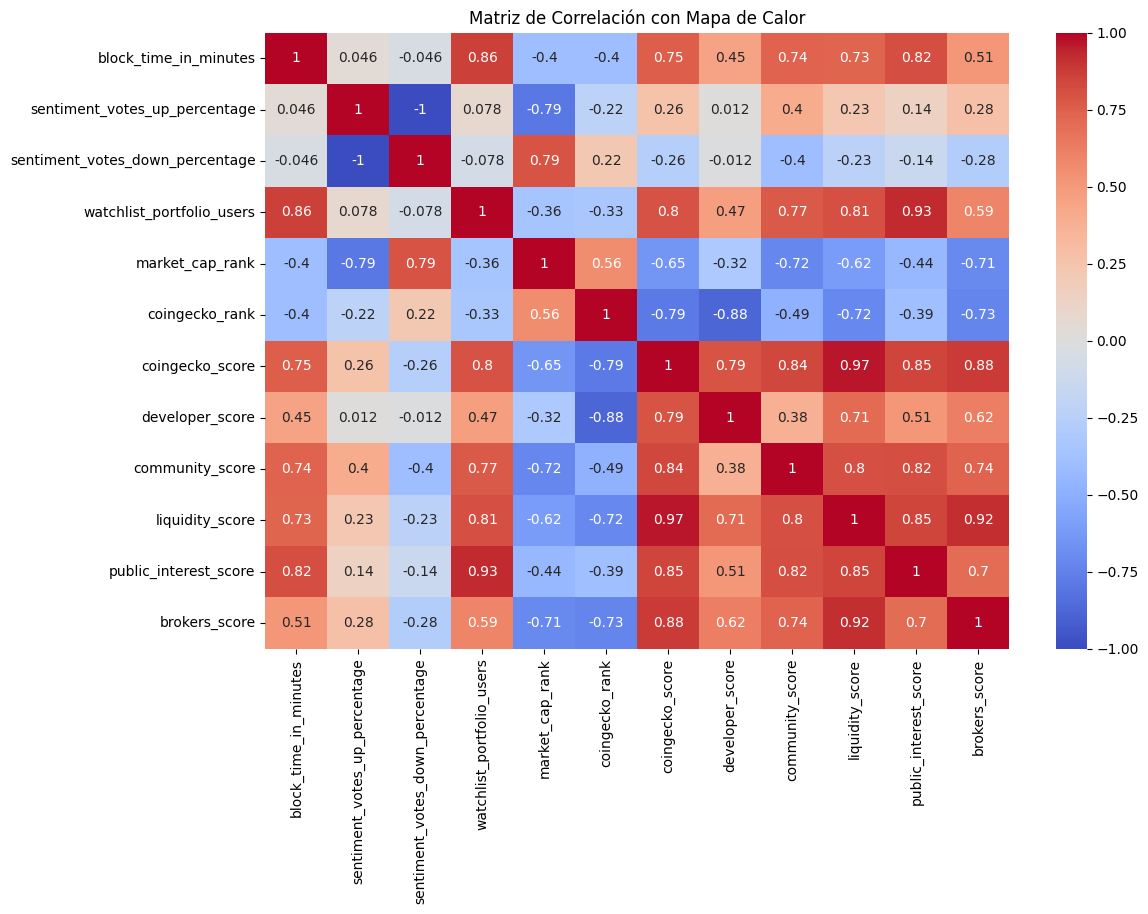

In [16]:
coins_corr = df_coins.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(coins_corr, annot=True, cmap='coolwarm', center=0)

plt.title('Matriz de Correlación con Mapa de Calor')
plt.show()

Hay columnas que son prácticamente equivalentes, como sentiments_votes_up vs sentiments_vote_down, liquidity_score vs coingecko_score (lo que sugiere que el score de coingecko está fuertemente influenciado por la liquidez); y también public_interest_score vs watchlist_porfolio_users (lo que sugiere que el score se basa fuertemente en la cantidad de usuarios que tienen la moneda en su watchlist).

Por este motivo, vamos a seleccionar cuidadosamente las columnas

In [17]:
exclude_columns = ['id', 'symbol', 'name', 'block_time_in_minutes', 'hashing_algorithm', 'categories', 'genesis_date',
                   'last_updated', 'sentiment_votes_down_percentage', 'watchlist_portfolio_users', 'liquidity_score'
                ]

features = df_coins[df_coins.columns.difference(exclude_columns)]

features

,brokers_score,coingecko_rank,coingecko_score,community_score,developer_score,market_cap_rank,public_interest_score,sentiment_votes_up_percentage
0,1500.000000,1,83.151,83.341,99.241,1,0.073,74.16
1,1297.500000,39,51.994,43.398,65.377,108,0.010,58.33
2,414.580645,67,48.677,37.138,77.359,152,0.002,66.67
3,90.000000,482,27.963,30.536,22.596,439,0.003,75.00
4,103.500000,226,35.921,6.546,72.995,1194,0.002,0.00
5,1176.000000,12,61.097,51.877,87.299,26,0.034,92.31
6,165.000000,217,36.358,33.960,51.505,422,0.001,80.00
7,458.181818,120,43.613,10.315,82.601,317,0.002,84.62
8,401.686047,64,49.214,43.240,79.653,356,0.003,66.67
9,1178.804348,18,56.684,39.685,87.898,143,0.004,76.92


Ahora aplicamos pre procesamiento y reducción de la dimensionalidad para lograr un índice único

In [18]:
# Manejar valores faltantes
imputer = SimpleImputer(strategy='mean')  # You can choose 'mean', 'median', etc.
features_imputed = imputer.fit_transform(features)

# Estandarizamos las features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_imputed)

# Reducimos dimenasionalidad
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)

# Calculamos el unified indicator usando los componentes PCA
df_coins['unified_indicator'] = reduced_features.mean(axis=1)

## Valoración de Privacidad/Seguridad
---

Para dar una valoración, usamos los datos de hashing algorithm y categories.

In [19]:
def calculate_privacy_score(row):
    privacy_score = 0
    
    if row['hashing_algorithm'] in ['RandomX', 'Equihash']:
        privacy_score += 2
    elif row['hashing_algorithm'] in ['AstroBWT', 'Blake-256']:
        privacy_score += 1
    
    if 'Zero Knowledge (ZK)' in row['categories']:
        privacy_score += 1
    
    return privacy_score

df_coins['privacy_score'] = df_coins.apply(calculate_privacy_score, axis=1)


En base a lectura especializada, otorgamos puntaje a los atributos presentes más deseables, y convertimos esta valoración de atributos en un score de privacidad/seguridad.

Exportamos a csv

In [20]:
df_coins.to_csv("df_coins.csv", index=False)